In [1]:
# Import libraries and read data into dataframe
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_parquet('../zippedData/merged_data.parquet')

# Create dataframe filtered by last 10 years of data
recent = df.loc[df.release_date.dt.year >= 2010]

## Runtime vs. ROI

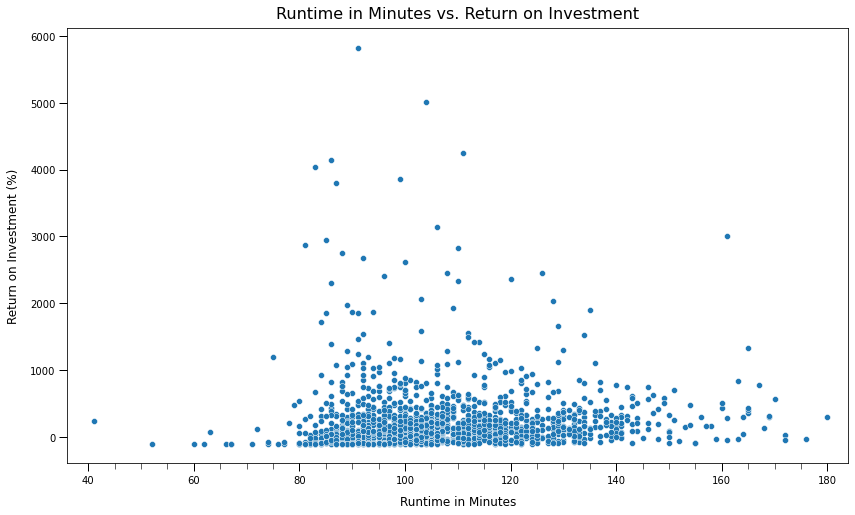

In [10]:
# Create seaborn scatterplot of runtime_min vs. ROI
# Not much semblance of correlation - if you are between ~90 and ~135 minutes (which is almost every movie), you make money
# Runtimes are all pretty close, the spread is not significant enough to try to separate into categorical "bins"

# Declare fig, ax objects as subplots
fig, ax = plt.subplots(figsize = (14, 8))

# Create seaborn scatterplot
sns.scatterplot(data = recent,
                x = 'runtime_min',
                y = 'ROI',
               ax = ax);

# Set axis labels and title
ax.set_xlabel('Runtime in Minutes',
              fontfamily = 'Arial',
              fontsize = 12,
              labelpad = 10)

ax.set_ylabel('Return on Investment (%)',
              fontfamily = 'Arial',
              fontsize = 12,
              labelpad = 10)

ax.set_title('Runtime in Minutes vs. Return on Investment',
             fontfamily = 'Arial',
             fontsize = 16,
             pad = 10)

# Set boundaries for x-axis
ax.set_xlim([36, 184])

# Turn on minor ticks, set tick parameters
ax.minorticks_on()
ax.yaxis.set_tick_params(which = 'minor', left = False)

ax.tick_params(axis = 'both',
               which = 'major',
               labelsize = 10,
               length = 8,
               width = 1)

ax.tick_params(axis = 'both',
               which = 'minor',
               length = 6)

# Set font for tick labels on both axes
for tick in ax.get_xticklabels():
    tick.set_fontname("Arial")
    
for tick in ax.get_yticklabels():
    tick.set_fontname("Arial")

In [3]:
# Create dataframe expanded along genres using pd.explode
expanded_genres = recent.explode('genres')

In [4]:
# Create dataframe grouped by genres with median ROI, median product budget, and a count of titles in the genre
groupby_genres_median = expanded_genres.groupby('genres').agg({'ROI': 'median',
                                                               'prod_budget': 'median',
                                                               'title': 'count'})

# Recast title column as int for use in further filtering
groupby_genres_median.title = groupby_genres_median.title.astype(int)

# Filter by genres that have at least 75 titles in data set
groupby_genres_median = groupby_genres_median.loc[groupby_genres_median.title >= 75]

# Create a dataframe that represents the top 6 genres by median ROI
top_6_by_median = groupby_genres_median.nlargest(6, 'ROI')

In [5]:
# Create a dataframe grouped by genres then ROI, reset index to turn back into a dataframe rather than groupby object
# This allows grouping of data without having to use aggregate functions
groupby_genres_ROI = expanded_genres.groupby(['genres', 'ROI']).first()
groupby_genres_ROI = groupby_genres_ROI.reset_index()

In [6]:
# Create dataframes representing the top 9 genres and the 6 genres by median (less influenced by outliers)
top_6_genres_by_median_raw_ROI = groupby_genres_ROI.loc[groupby_genres_ROI.genres.isin(list(top_6_by_median.index))]

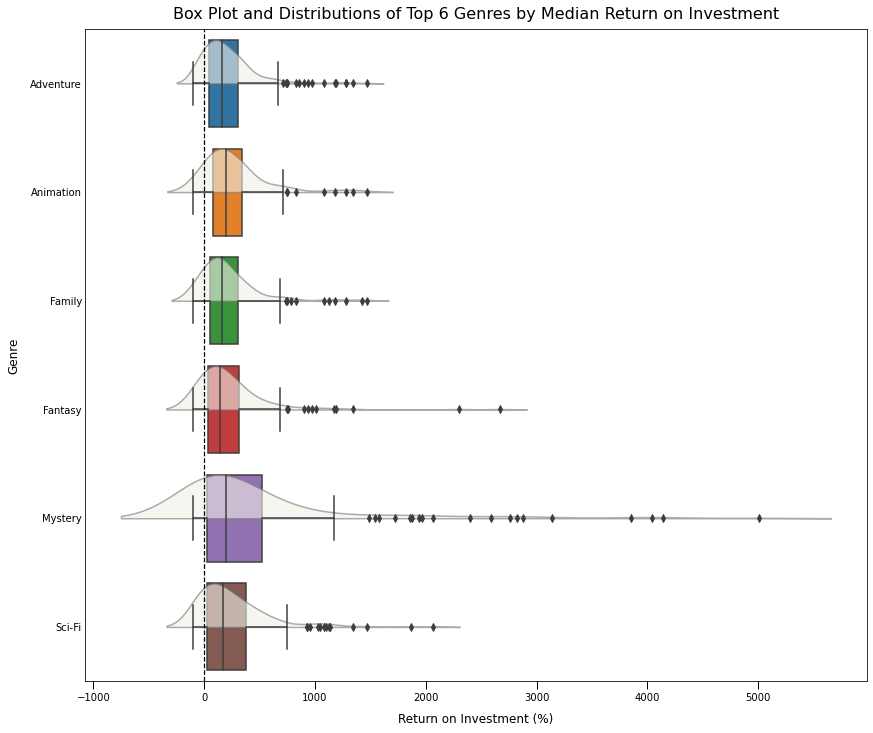

In [7]:
# Create an overlaid boxplot and violinplot for the top 6 genres by median to show distributions
# Declare fig, ax objects
fig, ax = plt.subplots(figsize=(14,12))

# Create seaborn boxplot
sns.boxplot(data = top_6_genres_by_median_raw_ROI,
            y = 'genres',
            x = 'ROI',
            orient = 'h',
            ax = ax)

# Create seaborn violinplot, forcibly creating a half violin by hueing only on true
sns.violinplot(data=top_6_genres_by_median_raw_ROI,
               orient='h',
               y='genres',
               x='ROI',
               inner='box',
               hue=True,
               hue_order = [True,False],
               split=True,
               color='#e7f294',
               ax=ax);

# Suppress legend created due to tricking violinplot to create half violin
ax.legend_ = None

# Set opacity of violinplot to 0.6
plt.setp(ax.collections, alpha=0.6)

# Create vertical line at ROI = 0 for clarity
ax.axvline(x=0, c='k', linestyle='--', linewidth=1.25);

# Set axis labels and title
ax.set_xlabel('Return on Investment (%)',
              fontfamily = 'Arial',
              fontsize = 12,
              labelpad = 10)

ax.set_ylabel('Genre',
              fontfamily = 'Arial',
              fontsize = 12,
              labelpad = 10)

ax.set_title('Box Plot and Distributions of Top 6 Genres by Median Return on Investment',
             fontfamily = 'Arial',
             fontsize = 16,
             pad = 10);

# Set tick labels
ax.tick_params(axis = 'both',
               which = 'major',
               labelsize = 10,
               length = 8,
               width = 1)

ax.tick_params(axis = 'y', length = 0, labelsize = 10)

# Set font for tick labels on both axes
for tick in ax.get_xticklabels():
    tick.set_fontname("Arial")
    
for tick in ax.get_yticklabels():
    tick.set_fontname("Arial")